In [1]:
import pandas as pd
import numpy as np

In [2]:
testdata = pd.read_csv("real_test1.csv")
traindata = pd.read_csv("real_train.csv")

# Data exploration

In [3]:
traindata

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31423,-1,638420,19360259,-1,23,2569487005,2018710401,1712143179,2308170622,2967512603,...,0,0,0,0,0,0,0,773194559,3617851689,4220791646
31424,-1,638422,19360260,-1,23,2569487005,403381353,2280365090,652481754,2967512603,...,0,0,0,0,0,0,0,4038791635,3617851689,4220791646
31425,-1,638461,19360392,-1,23,497926344,1235983246,1379688777,652481754,2116767313,...,0,0,0,0,0,0,0,1169636883,621902171,3706004275
31426,-1,638496,19360528,-1,23,2569487005,403381353,2780744710,652481754,2967512603,...,0,0,0,0,0,0,0,357042422,3617851689,4220791646


In [4]:
#I check if there are missing values
traindata.isnull().sum()
#there are no missing values

label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64

In [5]:
## I split my training set into dependant and independant variables
X = traindata.drop(["label","visitTime","hour","purchaseTime"], axis=1)
Y = traindata["label"]

In [6]:
## Now I import train_test_split to train my data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.33, stratify=Y)

# Balancing the data

In [7]:
## Let's look if the train dataset is balanced
import matplotlib.pyplot as plt
traindata['label'].value_counts().plot.bar()

In [8]:
## Now I look more precisely and I see that it's clearly unbalanced
traindata['label'].value_counts()
# it's imbalanced

-1    31371
 1       57
Name: label, dtype: int64

In [9]:
## We can use SMOTE to balance the dataset
import collections
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(random_state=42, sampling_strategy=0.3)
X_new, Y_new = sm.fit_resample(X_train,Y_train)
rs = RandomUnderSampler(random_state =42, sampling_strategy=0.7)
X_new, Y_new = rs.fit_resample(X_new, Y_new)
print('Resample dataset shape %s' % Counter(Y_new))


Resample dataset shape Counter({-1: 9007, 1: 6305})


# Models

In [10]:
## I have decided to run Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_new, Y_new)
pred = lr.predict(X_test)

In [11]:
## I can build a classification report to make it clearer
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

          -1       1.00      0.80      0.89     10353
           1       0.01      0.68      0.01        19

    accuracy                           0.80     10372
   macro avg       0.50      0.74      0.45     10372
weighted avg       1.00      0.80      0.89     10372



In [12]:
## And a quick confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,Y_test)

array([[8290,    6],
       [2063,   13]])

In [13]:
## I have also decided to do a quick random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, max_depth = 3, random_state = 42)
rf.fit(X_new, Y_new)
predrf = rf.predict(X_test)

In [14]:
print(classification_report(Y_test, predrf))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       0.25      0.84      0.38        19

    accuracy                           0.99     10372
   macro avg       0.62      0.92      0.69     10372
weighted avg       1.00      0.99      1.00     10372



In [15]:
confusion_matrix(predrf,Y_test)

array([[10304,     3],
       [   49,    16]])

# ROC curve

In [17]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

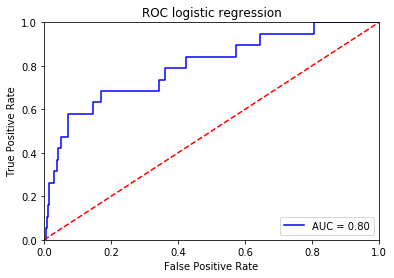

In [19]:
import matplotlib.pyplot as plt
plt.title('ROC logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Apply logistic regression to the test set

In [29]:
testdata

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,-1,32082,19446873,-1,23,2569487005,2018710401,887116886,652481754,2967512603,...,0,0,0,0,0,0,0,1546561973,3617851689,4220791646
32082,-1,32083,19446914,-1,23,2569487005,403381353,3475347077,652481754,2967512603,...,0,0,0,0,0,0,0,3227742820,3617851689,4220791646
32083,-1,32084,19446925,-1,23,2569487005,403381353,3475347077,652481754,2967512603,...,0,0,0,0,0,0,0,4069315994,3617851689,4220791646
32084,-1,32085,19446931,-1,23,2569487005,2541203883,448895441,2308170622,2967512603,...,0,0,0,0,0,0,0,2724771230,3617851689,4220791646


In [31]:
Xtsd = testdata.drop(["label","visitTime","hour","purchaseTime"], axis=1)
Ytsd = testdata["label"]

In [32]:
# Here we predict the probabilities
predts = lr.predict_proba(Xtsd)
predts



array([[0.94911731, 0.05088269],
       [0.76158729, 0.23841271],
       [0.8277118 , 0.1722882 ],
       ...,
       [0.81263525, 0.18736475],
       [0.71354869, 0.28645131],
       [0.54282389, 0.45717611]])

In [34]:
predictions = pd.DataFrame(predts)
df = predictions.rename(columns = {0:"No_Purchase",1:"Purchase"})
df

,No_Purchase,Purchase
0,0.949117,0.050883
1,0.761587,0.238413
2,0.827712,0.172288
3,0.439862,0.560138
4,0.974050,0.025950
...,...,...
32081,0.606753,0.393247
32082,0.816955,0.183045
32083,0.812635,0.187365
32084,0.713549,0.286451


In [36]:
# Merge two datasets
merged = pd.concat([Xtsd, df], axis=1, join='inner')
finalds = merged[["id","Purchase"]]
finalds

,id,Purchase
0,1,0.050883
1,2,0.238413
2,3,0.172288
3,4,0.560138
4,5,0.025950
...,...,...
32081,32082,0.393247
32082,32083,0.183045
32083,32084,0.187365
32084,32085,0.286451


In [37]:
finalds.to_csv("/Users/kimvogel/Documents/Documents/ESCP/Classes/Python/Machine learning class/MLAssigment_2_3_e197425_proba.csv")